# Verificando a veracidade da checagem das notícias do Corpus Fake.br

In [4]:
import numpy as np
import pandas as pd
from random import seed
from random import randint

pd.options.display.max_colwidth = 1000

# Dados

In [5]:
seed(42)
sample = list(map(lambda x : randint(1, 3600), range(20)))
sample.sort()

In [6]:
print(sample)

[103, 123, 131, 357, 384, 420, 457, 572, 896, 915, 1004, 1127, 1729, 2234, 2419, 2620, 2772, 3017, 3034, 3038]


In [7]:
# Selecionando amostra de notícias classificadas como falsas
noticias_meta_header = ["author", "link", "category", "date_of_publication", "number_of_tokens", "words_without_punct", "number_of_types",
                        "number_of_links", "upper_case_words", "number_of_verbs", "subj_and_imp_verbs", "number_of_nouns", "number_of_adjectives",
                        "number_of_adverbs", "number_modal_verbs", "sing_first_sec_personal_pronouns", "plural_first_personal_pronouns", "number_of_pronouns",
                        "pausality", "number_of_characters", "avg_sentence_length", "average_word_length", "perc_news_with_speeling_errors", 
                        "emotiveness", "diversity"]

noticias_fake_meta = pd.DataFrame(columns=noticias_meta_header)

for noticia in sample:
    with open("full_texts/fake-meta-information/{}-meta.txt".format(noticia), 'r') as f:
        data = f.read().replace('\n',',').replace(',,','\n')
        nova_noticia = pd.read_csv(pd.compat.StringIO(data), names = noticias_meta_header)
        noticias_fake_meta = noticias_fake_meta.append(nova_noticia, ignore_index=True)
        


noticias_fake_meta

In [9]:
noticias_fake_meta["link"]

0                       https://ceticismopolitico.com/2017/11/30/katia-abreu-diz-que-vai-colocar-sua-expulsao-em-uma-moldura-mas-nao-para-de-reclamar/
1       https://ceticismopolitico.com/2017/11/24/dr-ray-peita-bolsonaro-chama-o-de-conservador-fake-em-entrevista-a-danilo-gentili-e-divide-a-direita/
2                                                             https://afolhabrasil.com.br/politica/reinaldo-azevedo-desmascarado-pela-policia-federal/
3                        https://www.diariodobrasil.org/relatorio-assustador-do-bndes-mostra-dinheiro-publico-do-brasil-jorrando-em-paises-comunistas/
4                   https://www.diariodobrasil.org/radialista-americano-detona-o-pt-a-esquerda-so-vende-ilusao-eles-so-pensam-em-se-divertir-no-sitio/
5                  https://www.diariodobrasil.org/situacao-de-waack-e-mais-grave-do-que-se-pensava-apresentador-continuara-internado-no-sirio-libanes/
6                             https://www.diariodobrasil.org/problema-cardiaco-tira-william-wa

In [10]:
# Após análise manual, 1 representa que a notícia em questão foi verificada e é realmente falsa, 0 representa diferença da verificação dos autores
noticias_fake_meta["fake"] = [1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]

ValueError: Length of values does not match length of index

In [150]:
noticias_true_meta = utils.import_metadata("true")

0                                                       http://politica.estadao.com.br/noticias/geral,joesley-se-mantem-em-silencio-em-cpmi,70002099768
1                                       http://politica.estadao.com.br/blogs/fausto-macedo/carmen-durante-recesso-mantem-ativos-processos-da-lava-jato/
2                    http://www1.folha.uol.com.br/poder/2018/01/1948446-estudante-cria-igreja-inspirada-em-game-para-debater-imunidade-tributaria.shtml
3                                                  https://g1.globo.com/mundo/noticia/eua-afirmam-que-negociacoes-com-pyongyang-ainda-estao-longe.ghtml
4                         https://g1.globo.com/mundo/noticia/a-vida-das-desertoras-norte-coreanas-que-se-tornaram-estrelas-de-tv-na-coreia-do-sul.ghtml
5                                           https://g1.globo.com/mundo/noticia/donald-trump-anuncia-mike-pompeo-como-secretario-de-estado-dos-eua.ghtml
6                   https://g1.globo.com/espirito-santo/noticia/prefeitos-esvaziam-reuni

In [151]:
# Após análise manual, 1 representa que a notícia em questão foi verificada e é realmente verdadeira, 0 representa diferença da verificação dos autores
noticias_true_meta["true"] = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [152]:
from matplotlib import pyplot as plt
from matplotlib import style

style.use("ggplot")

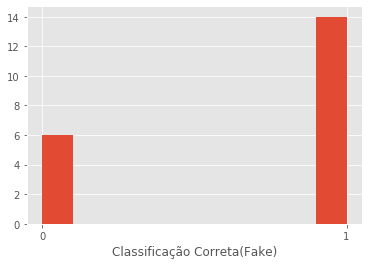

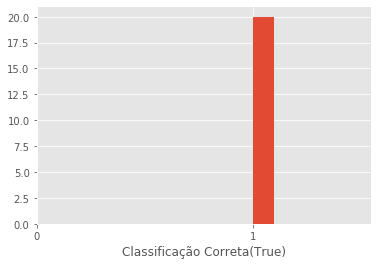

In [167]:
plt.hist(noticias_fake_meta["fake"])
plt.xlabel("Classificação Correta(Fake)")
plt.xticks([0, 1])
plt.show()

plt.hist(noticias_true_meta["true"])
plt.xlabel("Classificação Correta(True)")
plt.xticks([0, 1])
plt.show()

Como podemos observar, no grupo das notícias classificadas como verdadeiras, nossa checagem concorda com 100% das ocorrências na amostra. Porém este não é o caso para as classificadas como falsas. Utilizaremos intervalos de confiança para estimar a porcentagem de discordância na checagem de toda a população das notícias do corpus.

0.5
0.9


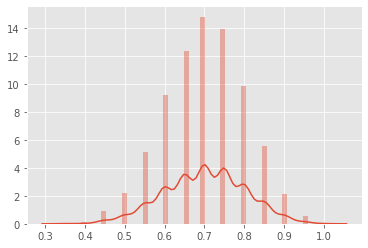

In [209]:
import seaborn as sns

percent_true = lambda x : list(x).count(1)/len(x)
bootstrap_dist = [percent_true(np.random.choice(noticias_fake_meta["fake"], 20, replace=True)) for _ in range(4000)]

print(np.percentile(bootstrap_dist, 2.5))
print(np.percentile(bootstrap_dist, 97.5))

sns.distplot(bootstrap_dist)